# FLIP (00): Data Science 
**(Module 03: Linear Algebra)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use,but NOT allowed to change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---
## Session 12 MoreEigenvalues

# Eigenvalues - going beyond the power method

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

## Variants on the power method

### The power method revisited

We are interested in computing the eigenvalues (and vectors) of a
general matrix, which may be very large.

The power method gave the largest eigenvalue, in absolute magnitude, as
long as it is unique and the eigenvectors are independent. It did this
by constructing a sequence, multiplying each time by the matrix $A$ and
normalizing.

This is a very simple method, and when we only need the largest
eigenvalue (e.g., for computing the spectral radius) gives exactly what
we need.

There may be times where we need different information. Provided it is
still only one eigenvalue that we are trying to find, there are variants
on the power method that can be used.

### Inverse power method

E.g. want to find the *smallest* eigenvalue. Important to find range of
scales in problem – problems with wildly varying scales difficult to
solve numerically.

Use:

$$\lambda_i \text{ are eigenvalues of } A \Rightarrow
    1/\lambda_i \text{ are eigenvalues of } A^{-1}$$

So apply power method to inverse matrix:

$$A {\boldsymbol{x}}_{n+1} = {\boldsymbol{x}}_n.$$

Converges towards eigenvector whose eigenvalue has *minimum* modulus.
Again, normalize at each step.

Do *not* use $A^{-1}$ directly, but solve linear system; decomposition
methods particularly effective.

### Inverse power method example

The matrix

$$A =
        \begin{pmatrix}
          1 & 2 & 3 \\
          4 & 5 & 6 \\
          7 & 8 & 0
        \end{pmatrix}$$

has eigenvalues

$$\left\{
          \begin{array}{c}
            12.1229\\ -5.7345\\ -0.3884
          \end{array}\right. .$$

The inverse power method shows linear convergence towards
$\lambda = -0.3884$.

In [3]:
def inverse_power_method(A, niterations_max=50, tol=1e-15):
    xn = np.zeros((len(A), niterations_max+1))
    xn[:, 0] = np.ones((len(A),)) + 1e-7*np.random.rand(len(A))
    rn = np.ones((niterations_max+1,))
    for k in range(niterations_max):
        xn[:,k] = xn[:,k] / np.linalg.norm(xn[:,k])
        xn[:,k+1] = np.linalg.solve(A, xn[:,k])
        rn[k+1] = np.sum(xn[:,k+1])/np.sum(xn[:,k])
        if (abs(rn[k+1]-rn[k]) < tol):
            break
    if k < niterations_max:
        rn[k+2:] = rn[k+1] # This ensures the later values are set to something sensible.
    return (1.0/rn[k+1], 1.0/rn)

In [4]:
A = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0],[7.0,8.0,0.0]])
lamda, v = np.linalg.eig(A)
order = np.abs(lamda).argsort()
lamda = lamda[order]
lamda_power, lamda_seq = inverse_power_method(A)

print("The minimum eigenvalue from the inverse power method is {} (exact is {}, error is {})".format(lamda_power, lamda[0], 
                                                                                             abs(lamda_power - lamda[0])))

The minimum eigenvalue from the inverse power method is -0.3883838424073199 (exact is -0.3883838424073202, error is 3.3306690738754696e-16)


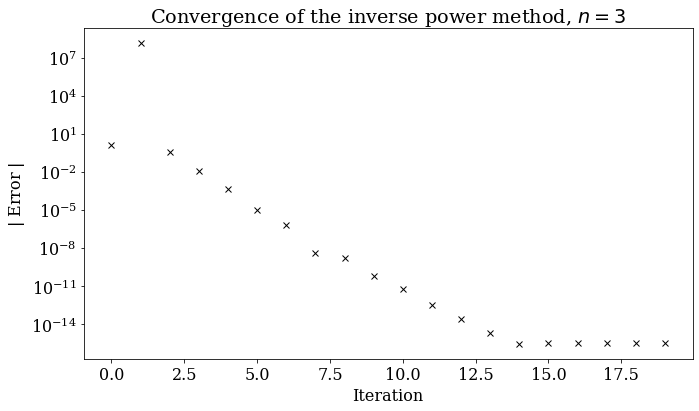

In [5]:
errors = np.abs(lamda_seq - lamda[0])
iterations = range(len(errors))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.semilogy(iterations[:20], errors[:20], 'kx')
ax.set_xlabel('Iteration')
ax.set_ylabel(r"$\|$ Error $\|$")
ax.set_title(r"Convergence of the inverse power method, $n=3$")
fig.tight_layout()
plt.show()

### Shifted power method

Another minor variant allows us to find the eigenvalue closest to a
given complex number $\sigma$. We just have to make use of:

$$\lambda_i \text{ are eigenvalues of } A \Rightarrow
    \lambda_i - \sigma \text{ are eigenvalues of } A - \sigma
    \text{Id}$$

Therefore the smallest eigenvalue of $A - \sigma \text{Id}$ is the one
closest to $\sigma$; this is just an application of the inverse power
method.

### Shifted power method example

The matrix

$$A =
        \begin{pmatrix}
          1 & 2 & 3 \\
          4 & 5 & 6 \\
          7 & 8 & 0
        \end{pmatrix}$$

has eigenvalues

$$\left\{
          \begin{array}{c}
            12.1229\\ -5.7345\\ -0.3884
          \end{array}\right. .$$

The shifted power method shows linear convergence to $\lambda =
      -5.7345$ for the eigenvalue closest to $-5$.

In [6]:
def shifted_power_method(A, sigma, niterations_max=50, tol=1e-15):
    Ashift = A - sigma * np.eye(len(A))
    xn = np.zeros((len(A), niterations_max+1))
    xn[:, 0] = np.ones((len(A),)) + 1e-7*np.random.rand(len(A))
    rn = np.ones((niterations_max+1,))
    for k in range(niterations_max):
        xn[:,k] = xn[:,k] / np.linalg.norm(xn[:,k])
        xn[:,k+1] = np.linalg.solve(Ashift, xn[:,k])
        rn[k+1] = np.sum(xn[:,k+1])/np.sum(xn[:,k])
        if (abs(rn[k+1]-rn[k]) < tol):
            break
    if k < niterations_max:
        rn[k+2:] = rn[k+1] # This ensures the later values are set to something sensible.
    return (1.0/rn[k+1] + sigma, 1.0/rn + sigma)

In [7]:
lamda_shift, lamda_seq = shifted_power_method(A, -5.0)

print("The eigenvalue closest to -5.0 from the shifted power method is {} (exact is {}, error is {})".format(lamda_shift, lamda[1], 
                                                                                             abs(lamda_shift - lamda[1])))

The eigenvalue closest to -5.0 from the shifted power method is -5.734509942225073 (exact is -5.734509942225075, error is 1.7763568394002505e-15)


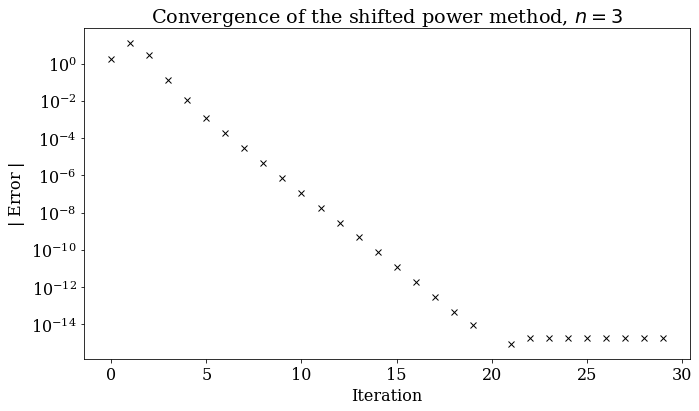

In [8]:
errors = np.abs(lamda_seq - lamda[1])
iterations = range(len(errors))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.semilogy(iterations[:30], errors[:30], 'kx')
ax.set_xlabel('Iteration')
ax.set_ylabel(r"$\|$ Error $\|$")
ax.set_title(r"Convergence of the shifted power method, $n=3$")
fig.tight_layout()
plt.show()

# The full spectrum

## Similar matrices

Standard trick: convert to equivalent problem that is easy to solve.
Typical simpler problems based on diagonal or triangular matrices. To
compute *all* the eigenvalues of $A$, note that for diagonal and
triangular matrices, *the eigenvalues are the diagonal entries*.

So which matrix problems are “equivalent”? Means the spectrum, the set
of all eigenvalues, is unchanged. One particular useful case is the
*similarity transform*:

**Definition**: The matrices $A,B$ are similar if there exists a nonsingular matrix
$P$ such that

$$B = P A P^{-1}.$$

**Theorem**: Similar matrices have the same eigenvalues.

### Geometric interpretation of similarity transforms

A similarity transform expresses that the matrix equation

$$A {\boldsymbol{u}} = {\boldsymbol{v}}$$

is independent of the coordinates in which it is written.


Under a change of coordinates that does not move the origin, the vectors
“rotate” to e.g.

$${\boldsymbol{u}}' = R {\boldsymbol{u}}$$

for some rotation matrix $R$. Hence our original equation becomes

$$R A R^{-1} {\boldsymbol{u}}' = {\boldsymbol{v}}';$$

if the “physical” properties of $A$ and $R A R^{-1}$ are the same, then
they are independent of the coordinates.

## Schur’s theorem

So we want to find a triangular matrix $B$ that $A$ is similar to; from
that we can just read off the eigenvalues. Is this even possible?

**Schur’s Theorem**: Every square matrix is unitary similar to a triangular matrix.

**Corollary**: Every Hermitian matrix $A = A^{\dagger}$ is unitary similar to a
diagonal matrix.

### Householder reflections

**Schur’s Theorem**: Every square matrix is unitary similar to a triangular matrix.

One key step in the proof of the theorem is the use of *Householder
reflections*:

**Lemma**: If ${\boldsymbol{x}}$, ${\boldsymbol{y}}$ are vectors such that
$\|{\boldsymbol{x}}\|_2 =
  \|{\boldsymbol{y}}\|_2$ and $({\boldsymbol{x}},{\boldsymbol{y}})$ is
real then the matrix $U = \text{Id} -
  {\boldsymbol{u}} {\boldsymbol{u}}^{\dagger}$ defined from

$${\boldsymbol{u}} = \sqrt{2} \frac{{\boldsymbol{x}} - {\boldsymbol{y}}}{\|{\boldsymbol{x}} - {\boldsymbol{y}}\|_2}$$

gives $U {\boldsymbol{x}} = {\boldsymbol{y}}$.

Geometric interpretation: to get ${\boldsymbol{y}}$ from
${\boldsymbol{x}}$, reflect ${\boldsymbol{x}}$ in plane orthogonal to
${\boldsymbol{u}}$.

### Key steps in the proof

Proof of Schur’s theorem by induction $n$. Obviously true for $n=1$
(scalar numbers). Aim: reduce matrix $A$ such that

$$U A U^{\dagger} = \left(
      \begin{array}{c|c c c}
        \mu_1 & & {\boldsymbol{w}}& \\ \hline
        0 & &  & \\
        \vdots & & A_{n-1}  & \\
        0 & &  & \\
      \end{array}\right).$$

I.e., rotate first column into a scalar multiple of the unit column
vector $\hat{{\boldsymbol{e}}}_1 = (1, 0, \dots 0)^T$.

Straightforward: construct appropriate Householder reflection

$$U = \text{Id} - {\boldsymbol{u}}{\boldsymbol{u}}^{\dagger}.$$

This rotates *to* $\hat{{\boldsymbol{e}}}_1$; but what should it rotate
from?

$$U A U^{\dagger} = \left(
      \begin{array}{c|c c c}
        \mu_1 & & {\boldsymbol{w}}& \\ \hline
        0 & &  & \\
        \vdots & & A_{n-1}  & \\
        0 & &  & \\
      \end{array}\right).$$

Want to rotate first column into scalar multiple of unit column vector
$\hat{{\boldsymbol{e}}}_1 = (1, 0, \dots 0)^T$.

Construct the appropriate Householder reflection

$$U = \text{Id} - {\boldsymbol{u}}{\boldsymbol{u}}^{\dagger}.$$

This rotates *to* $\hat{{\boldsymbol{e}}}_1$; but what should it rotate
from?

New matrix has $\hat{{\boldsymbol{e}}}_1$ as eigenvector, eigenvalue
$\mu_1$. Must be using an eigenvector to construct rotation; (suitably
scaled) eigenvector is used as the vector to rotate *from*.

The appropriate Householder reflection matrix is

$$\begin{aligned}
    U = \text{Id} - {\boldsymbol{u}}{\boldsymbol{u}}^{\dagger}, & \mbox{} &  
    {\boldsymbol{u}} = \sqrt{2}\frac{\left( \hat{{\boldsymbol{e}}}_1-\hat{{\boldsymbol{v}}}_1 \right)
    }{||\hat{{\boldsymbol{e}}}_1- \hat{{\boldsymbol{v}}}_1||_2},
  \end{aligned}$$

where $\hat{{\boldsymbol{v}}}_1$ is the unit eigenvector with eigenvalue
$\mu_1$.

We can verify this by computing the product

$$\begin{aligned}
    U A U^{\dagger}\hat{{\boldsymbol{e}}}_1 =  \mu_1 \hat{{\boldsymbol{e}}}_1   
  \end{aligned}$$

for a general square matrix and

$$\begin{aligned}
    \hat{{\boldsymbol{e}}}_1^{\dagger} U A U^{\dagger} = \mu_1 \hat{{\boldsymbol{e}}}_1^{\dagger}
  \end{aligned}$$

for an Hermitian matrix.

**Schur’s Theorem**: Every square matrix is unitary similar to a triangular matrix.

**Corollary**: Every Hermitian matrix $A = A^{\dagger}$ is unitary similar to a
diagonal matrix.

Does this help us?

Although comforting, proof is useless in practice: it uses the
eigenvectors, which is exactly the information we are trying to find.

However, the steps used in the proof will be of fundamental importance
in finding the full spectrum of a matrix as we will see next time.

## Summary


-   The power method is an iterative procedure giving the eigenvalue of
    largest absolute modulus and its associated eigenvector.

-   By looking at the inverse matrix the power method can be modified to
    give

    1.  the eigenvalue of smallest absolute modulus (inverse power
        method)

    2.  the eigenvalue closest to a given $\sigma \in {\mathbb C}$
        (shifted inverse power method).

-   To find the full spectrum it is easiest to transform the matrix to
    an “equivalent” diagonal or triangular matrix; in these cases the
    eigenvalues are the diagonal entries.

-   Similar matrices $A$, $B = P A P^{-1}$ have the same spectrum.

-   Schur’s theorem states that every square matrix is unitary similar
    to a triangular matrix.

-   A key step in the proof the the use of Householder reflections.